In [1]:
import shapely
from shapely import geometry
from shapely.geometry import shape, Point, LineString, Polygon
import fiona
import geopandas as gpd
import numpy as np
import geopandas as gp
from pyproj import CRS

In [2]:
# Open the dataset from the file
shapefile = fiona.open('./data/shapefiles/CLC2012_PT_v2/CLC2012_PT_v2.shp')
# Make sure the dataset exists -- it would be None if we couldn't open it
if not shapefile:
    print('Error: could not open shapefile')

In [3]:
### Let's get the driver from this file
driver = shapefile.driver
print('Dataset driver is: {n}\n'.format(n=driver))

### How many features are contained in this Shapefile?
feature_count = len(shapefile)
print('The shapefile has {n} feature(s)\n'.format(n=feature_count))

### What is the shapefiles's projection?
# Get the spatial reference
spatial_ref = shapefile.crs
print('The shapefiles spatial ref is:\n', spatial_ref, '\n')

# Let's pull out a specific feature from the shapefile
feature = shapefile[0]

### What is the features's geometry? is it a point? a polyline? a polygon?
geometry = feature['geometry']['type']
print("The features's geometry is: {geom}\n".format(geom=geometry))

### How many properties are in the shapefile, and what are their names?
properties = feature["properties"].keys()

# How many fields
field_count = len(properties)
print('Layer has {n} fields'.format(n=field_count))

# What are their names?
print('Their names are: ')
for prop in properties:
    print('\t{name}'.format(name=prop))

Dataset driver is: ESRI Shapefile

The shapefile has 53776 feature(s)

The shapefiles spatial ref is:
 {'proj': 'tmerc', 'lat_0': 39.6682583333333, 'lon_0': -8.13310833333333, 'k': 1, 'x_0': 0, 'y_0': 0, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True} 

The features's geometry is: Polygon

Layer has 4 fields
Their names are: 
	AREA_ha
	CLC2012
	Legenda
	ID


In [4]:
shapefile.meta

{'driver': 'ESRI Shapefile',
 'schema': {'properties': OrderedDict([('AREA_ha', 'float:19.11'),
               ('CLC2012', 'int:3'),
               ('Legenda', 'str:200'),
               ('ID', 'int:9')]),
  'geometry': 'Polygon'},
 'crs': {'proj': 'tmerc',
  'lat_0': 39.6682583333333,
  'lon_0': -8.13310833333333,
  'k': 1,
  'x_0': 0,
  'y_0': 0,
  'ellps': 'GRS80',
  'units': 'm',
  'no_defs': True},
 'crs_wkt': 'PROJCS["ETRS89_Portugal_TM06",GEOGCS["GCS_ETRS_1989",DATUM["D_ETRS_1989",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",39.6682583333333],PARAMETER["central_meridian",-8.13310833333333],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'}

In [5]:
feature = shapefile[0]
feature # The result is a Python dictionary

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('AREA_ha', 287.471753986),
              ('CLC2012', 111),
              ('Legenda', 'Tecido urbano contínuo'),
              ('ID', 1)]),
 'geometry': {'type': 'Polygon',
  'coordinates': [[(18685.92039999913, -293338.38560000074),
    (18770.192800001358, -293402.0581),
    (18972.738299999502, -293371.5312),
    (19233.14839999989, -293341.4999999995),
    (19125.525399999286, -293461.46869999956),
    (18989.177699999796, -293583.15619999846),
    (18842.085000000836, -293690.1147000012),
    (18871.1250999989, -293752.0690000012),
    (18905.98149999976, -293796.8845000001),
    (18930.879099998972, -293856.63819999935),
    (18960.756000000198, -293881.5355999987),
    (19000.591799999675, -293889.00489999977),
    (19045.407199999812, -293884.02540000016),
    (19097.6918, -293859.12789999973),
    (19164.914900001313, -293846.6792000001),
    (19212.219999999652, -293871.57670000044),
    (19237.117399999028, -293906.

In [6]:
feature.keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [7]:
print('id: ', feature['id']) #gives the id
print('Land Cover Class: ', feature['properties']['Legenda']) # gives the value of the classname attribute

print('\ngeometry: ', feature['geometry']) # gives the geometry, GeoJSON format

id:  0
Land Cover Class:  Tecido urbano contínuo

geometry:  {'type': 'Polygon', 'coordinates': [[(18685.92039999913, -293338.38560000074), (18770.192800001358, -293402.0581), (18972.738299999502, -293371.5312), (19233.14839999989, -293341.4999999995), (19125.525399999286, -293461.46869999956), (18989.177699999796, -293583.15619999846), (18842.085000000836, -293690.1147000012), (18871.1250999989, -293752.0690000012), (18905.98149999976, -293796.8845000001), (18930.879099998972, -293856.63819999935), (18960.756000000198, -293881.5355999987), (19000.591799999675, -293889.00489999977), (19045.407199999812, -293884.02540000016), (19097.6918, -293859.12789999973), (19164.914900001313, -293846.6792000001), (19212.219999999652, -293871.57670000044), (19237.117399999028, -293906.4330000003), (19224.66869999934, -293958.7175999983), (19184.83280000105, -294045.85859999934), (19197.19810000062, -294100.2661000006), (19251.568500000983, -294127.46869999944), (19354.75200000021, -294191.7499999992

<class 'shapely.geometry.polygon.Polygon'>


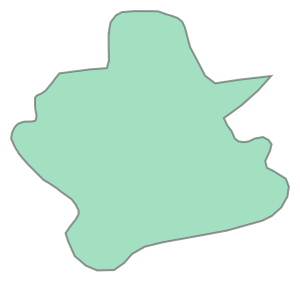

In [8]:
shapely_shape = shape(feature['geometry'])
print(type(shapely_shape))

shapely_shape

In [9]:
shapefile = gpd.read_file('./data/shapefiles/CLC2012_PT_v2/CLC2012_PT_v2.shp')
shapefile.head()

,AREA_ha,CLC2012,Legenda,ID,geometry
0,287.471754,111,Tecido urbano contínuo,1,"POLYGON ((18685.920 -293338.386, 18770.193 -29..."
1,275.900895,111,Tecido urbano contínuo,2,"POLYGON ((26764.900 -291471.875, 26786.334 -29..."
2,101.100914,111,Tecido urbano contínuo,3,"POLYGON ((3106.160 -287769.063, 3100.722 -2878..."
3,28.932375,111,Tecido urbano contínuo,4,"POLYGON ((-48135.685 -284368.597, -48105.974 -..."
4,109.973855,111,Tecido urbano contínuo,5,"POLYGON ((-21147.143 -284032.092, -21014.035 -..."


In [10]:
shapefile_filtered = shapefile.filter(['Legenda', 'geometry'])
shapefile_filtered.head()

,Legenda,geometry
0,Tecido urbano contínuo,"POLYGON ((18685.920 -293338.386, 18770.193 -29..."
1,Tecido urbano contínuo,"POLYGON ((26764.900 -291471.875, 26786.334 -29..."
2,Tecido urbano contínuo,"POLYGON ((3106.160 -287769.063, 3100.722 -2878..."
3,Tecido urbano contínuo,"POLYGON ((-48135.685 -284368.597, -48105.974 -..."
4,Tecido urbano contínuo,"POLYGON ((-21147.143 -284032.092, -21014.035 -..."


In [11]:
initial_crs = shapefile.crs
initial_crs

{'proj': 'tmerc',
 'lat_0': 39.6682583333333,
 'lon_0': -8.13310833333333,
 'k': 1,
 'x_0': 0,
 'y_0': 0,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

In [12]:
from pyproj import CRS
CRS(shapefile.crs)

<Projected CRS: +proj=tmerc +lat_0=39.6682583333333 +lon_0=-8.1331 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
shapefile.bounds

,minx,miny,maxx,maxy
0,17080.0215,-294951.4999,19380.1993,-292804.0811
1,25014.5391,-293571.3437,28100.6895,-291199.6236
2,2126.1274,-289232.5311,3577.8242,-287665.0312
3,-48281.8595,-285265.3470,-47693.6214,-284303.3125
4,-21405.6196,-285051.4061,-19507.7148,-284032.0916
...,...,...,...,...
53771,-48575.9047,167635.7850,-46146.6718,169701.0000
53772,-55076.6484,204694.1563,-50910.5976,208331.8906
53773,-59396.1259,223007.5131,-52912.2656,225591.9688
53774,-61277.9374,243545.4956,-51113.0195,252421.6141


In [14]:
shapefile = shapefile.to_crs({'init': 'epsg:4326'})

C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [15]:
shapefile.geometry = shapefile.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))

In [16]:
shapefile.bounds

,minx,miny,maxx,maxy
0,37.010940,-7.941171,37.030284,-7.915333
1,37.023193,-7.851944,37.044540,-7.817265
2,37.062634,-8.109201,37.076760,-8.092880
3,37.097166,-8.676275,37.105817,-8.669628
4,37.100102,-8.373929,37.109262,-8.352574
...,...,...,...,...
53771,41.176503,-8.712066,41.195187,-8.683211
53772,41.509872,-8.793162,41.542466,-8.742993
53773,41.674274,-8.846448,41.697963,-8.768713
53774,41.859026,-8.871157,41.939640,-8.749444


In [17]:
unique= np.unique(shapefile['Legenda'])
print('List of Land Cover Classes:')
unique

List of Land Cover Classes:


array(['Aeroportos e aeródromos',
       'Agricultura com espaços naturais e semi-naturais', 'Arrozais',
       'Culturas temporárias de regadio',
       'Culturas temporárias de sequeiro',
       'Culturas temporárias e/ou pastagens associadas a culturas permanentes',
       'Cursos de água', 'Desembocaduras fluviais',
       'Equipamentos desportivos, culturais e de lazer e zonas históricas',
       'Espaços verdes urbanos',
       'Florestas abertas, cortes e novas plantações',
       'Florestas de folhosas', 'Florestas de resinosas',
       'Florestas mistas', 'Indústria, comércio e equipamentos gerais',
       'Lagoas costeiras', 'Matos', 'Oceano', 'Olivais',
       'Pastagens permanentes', 'Paúis', 'Planos de água', 'Pomares',
       'Praias, dunas e areais',
       'Redes viárias e ferroviárias e espaços associados', 'Rocha nua',
       'Salinas e aquicultura litoral', 'Sapais',
       'Sistemas agro-florestais',
       'Sistemas culturais e parcelares complexos',
       'Tecido

In [1]:
polygon = Polygon([ # from manifest.safe
    (39.073198659648654, -8.8871765),
    (39.0526886902376, -8.894318),
    (38.906045290370265 ,-8.945374),
    (38.760328595167564 ,-8.996094),
    (38.755193805393134 ,-10.151337),
    (39.74439520181332 ,-10.167633),
    (39.750212021802014 ,-8.886078),
    (39.073198659648654 ,-8.8871765)
])
polygon

NameError: name 'Polygon' is not defined

In [31]:
imageBounds = gp.GeoDataFrame(crs={'init': 'epsg:4326'})

In [32]:
imageBounds.geometry = [polygon]

In [33]:
.bounds

,minx,miny,maxx,maxy
0,38.755194,-10.167633,39.750212,-8.886078


In [37]:
teste.geometry = imageBounds.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))
teste = teste.to_crs(fiona.crs.from_epsg(32629))
teste.bounds

C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


,minx,miny,maxx,maxy
0,399959.291212,4.290181e+06,509759.689005,4.400040e+06


In [22]:
shapefile.bounds

,minx,miny,maxx,maxy
0,37.010940,-7.941171,37.030284,-7.915333
1,37.023193,-7.851944,37.044540,-7.817265
2,37.062634,-8.109201,37.076760,-8.092880
3,37.097166,-8.676275,37.105817,-8.669628
4,37.100102,-8.373929,37.109262,-8.352574
...,...,...,...,...
53771,41.176503,-8.712066,41.195187,-8.683211
53772,41.509872,-8.793162,41.542466,-8.742993
53773,41.674274,-8.846448,41.697963,-8.768713
53774,41.859026,-8.871157,41.939640,-8.749444


In [23]:
intersected = gp.sjoin(imageBounds, shapefile, how='inner', op='intersects', lsuffix='left', rsuffix='right')
intersected 

,geometry,index_right,AREA_ha,CLC2012,Legenda,ID
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",44780,8592.345195,323,Vegetação esclerófila,44781
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",38977,885.953160,313,Florestas mistas,38978
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",14581,25.850329,231,Pastagens permanentes,14582
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",18475,123.728499,242,Sistemas culturais e parcelares complexos,18476
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",6302,33.382401,211,Culturas temporárias de sequeiro,6303
...,...,...,...,...,...,...
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",35699,376.061174,312,Florestas de resinosas,35700
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",22679,138.537581,243,Agricultura com espaços naturais e semi-naturais,22680
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",42124,75.307930,322,Matos,42125
0,"POLYGON ((39.07320 -8.88718, 39.05269 -8.89432...",736,69.149133,112,Tecido urbano descontínuo,737


In [24]:
intersected.crs

{'init': 'epsg:4326'}

In [25]:
intersected.bounds

,minx,miny,maxx,maxy
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
...,...,...,...,...
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078


In [26]:
#intersected = intersected.to_crs(fiona.crs.from_epsg(32629))
intersected.crs = initial_crs
intersected.crs

{'proj': 'tmerc',
 'lat_0': 39.6682583333333,
 'lon_0': -8.13310833333333,
 'k': 1,
 'x_0': 0,
 'y_0': 0,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

In [27]:
intersected.bounds

,minx,miny,maxx,maxy
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
...,...,...,...,...
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078
0,38.755194,-10.167633,39.750212,-8.886078


In [28]:
import os
# create a products directory within the data dir which won't be uploaded to Github
img_dir = './data/shapefiles/shp_2012_IMG_DATA_1/'

# check to see if the dir it exists, if not, create it
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

In [29]:
intersected.to_file(img_dir + 'shp_2012_IMG_DATA_1.shp')